# FloPy 

### Working stack demo

A short demonstration of some of the `flopy3` awesomeness

In [1]:
%matplotlib inline
from __future__ import print_function
import os
import numpy as np
import pandas as pd

import flopy

###Model Inputs

In [2]:
# first lets load an existing model
model_ws = "data"
ml = flopy.modflow.Modflow.load("freyberg.nam", model_ws=model_ws, verbose=True)
ml.exe_name = "mf2005"

ml.dis.sr.rotation = 15
ml.version = "mf2005"


Creating new model with name: freyberg
--------------------------------------------------

Parsing the namefile --> data/freyberg.nam
Setting filehandles:

--------------------------------------------------
External unit dictionary:
{19: filename:data/freyberg.rch, filetype:RCH, 2: filename:data/freyberg.list, filetype:LIST, 11: filename:data/freyberg.dis, filetype:DIS, 13: filename:data/freyberg.bas, filetype:BAS6, 14: filename:data/freyberg.oc, filetype:OC, 15: filename:data/freyberg.lpf, filetype:LPF, 18: filename:data/freyberg.riv, filetype:RIV, 51: filename:data/freyberg.hds, filetype:DATA(BINARY), 52: filename:data/freyberg.ddn, filetype:DATA(BINARY), 53: filename:data/freyberg.cbc, filetype:DATA(BINARY), 20: filename:data/freyberg.wel, filetype:WEL, 27: filename:data/freyberg.pcg, filetype:PCG}
--------------------------------------------------

loading dis package file...
   Loading dis package with:
      1 layers, 40 rows, 20 columns, and 1 stress periods
   loading laycbd..

/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")


Let's looks at some plots

plotting LPF package Util3d instance: ss
plotting LPF package Util3d instance: hk
plotting LPF package Util3d instance: hani
plotting LPF package Util3d instance: vka
plotting LPF package Util3d instance: vkcb
plotting LPF package Util3d instance: wetdry
plotting LPF package Util3d instance: sy


/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")


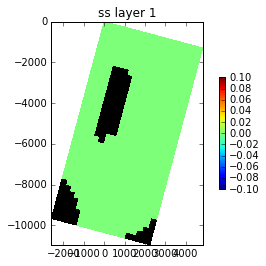

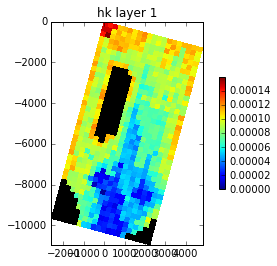

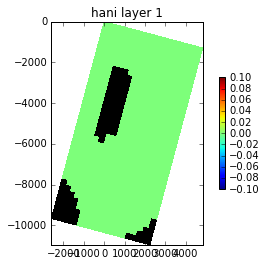

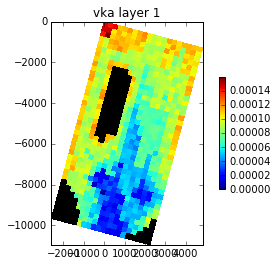

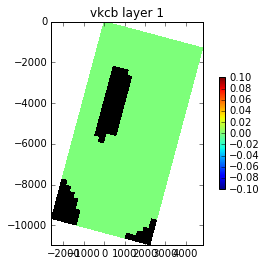

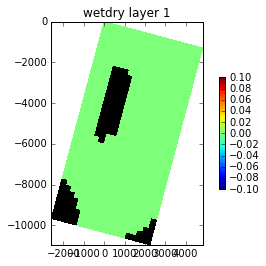

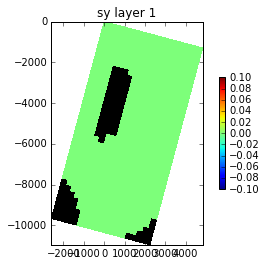

In [3]:
ml.lpf.plot()

plotting DIS package Util2d instance: top
plotting DIS package Util3d instance: botm
plotting DIS package Util3d instance: _ModflowDis__thickness


/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")


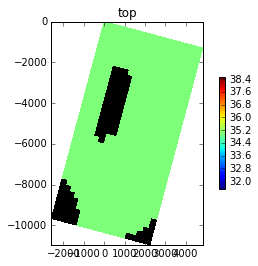

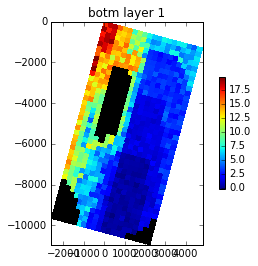

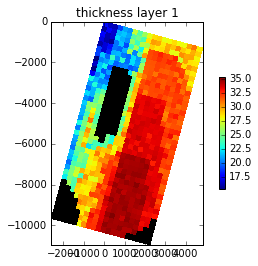

In [4]:
ml.dis.plot()

plotting RIV package MfList instance: stress_period_data


/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")


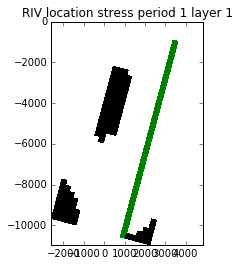

In [5]:
ml.riv.plot()

Let's write a giant shapefile with all model inputs

In [6]:
#ml.to_shapefile(os.path.join(model_ws,"freyberg.shp"))
ml.export(os.path.join(model_ws,"freyberg.shp"))

/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")
/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:171: UserWarning: ModflowDis.start_datetime is deprecated. use Modflow.start_datetime
  "use Modflow.start_datetime")


Let's also write a netCDF file with all model inputs

In [7]:
ml.export(os.path.join(model_ws, "freyberg.nc"))

2016-02-06 13:26:08.161232 WARNING: removing existing nc file: data/freyberg.nc

2016-02-06 13:26:08.161651 starting: initializing attributes

2016-02-06 13:26:08.161699 finished: initializing attributes, took: 0:00:00.000048

2016-02-06 13:26:08.161717 starting: initializing file

2016-02-06 13:26:08.161737 starting: initializing geometry

2016-02-06 13:26:08.163575 starting: building grid crs using proj4 string: +init=EPSG:4326

2016-02-06 13:26:08.163722 finished: building grid crs using proj4 string: +init=EPSG:4326, took: 0:00:00.000147

2016-02-06 13:26:08.164385 starting: projecting grid cell center arrays from <pyproj.Proj object at 0x10beb9708> to <pyproj.Proj object at 0x10beb9768>

2016-02-06 13:26:08.164457 finished: projecting grid cell center arrays from <pyproj.Proj object at 0x10beb9708> to <pyproj.Proj object at 0x10beb9768>, took: 0:00:00.000072

2016-02-06 13:26:08.164816 finished: initializing geometry, took: 0:00:00.003079

2016-02-06 13:26:08.174034 starting: sett

/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:171: UserWarning: ModflowDis.start_datetime is deprecated. use Modflow.start_datetime
  "use Modflow.start_datetime")
/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")


### Run the model

In [8]:
ml.write_input()

ml.run_model()
ml


Writing packages:
   Package:  DIS
   Package:  RCH
   Package:  BAS6
   Package:  OC
   Package:  LPF
   Package:  RIV
   Package:  WEL
   Package:  PCG
 
FloPy is using the following executable to run the model: /Users/jdhughes/Documents/Development/bin/mac/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 x/x/2015                        

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2016/02/06 13:26:08

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2016/02/06 13:26:08
 Elapsed run time:  0.008 Seconds

  Normal termination of simulation


MODFLOW 1 layer(s), 40 row(s), 20 column(s), 1 stress period(s)

### Output inspection

First, let's look at the list file

In [9]:
mfl = flopy.utils.MfListBudget(os.path.join(model_ws,"freyberg.list"))
df_flux, df_vol = mfl.get_dataframes(start_datetime="10-21-2015")
df_flux # multiindex columns

,STORAGE_IN,CONSTANT_HEAD_IN,WELLS_IN,RIVER_LEAKAGE_IN,RECHARGE_IN,TOTAL_IN,STORAGE_OUT,CONSTANT_HEAD_OUT,WELLS_OUT,RIVER_LEAKAGE_OUT,RECHARGE_OUT,TOTAL_OUT,IN-OUT,PERCENT_DISCREPANCY
2015-10-21 00:00:10.000022,0,0,0,0.004194,0.0695,0.073694,0,0.004735,0.02205,0.04691,0,0.073695,-6.407500e-07,-0


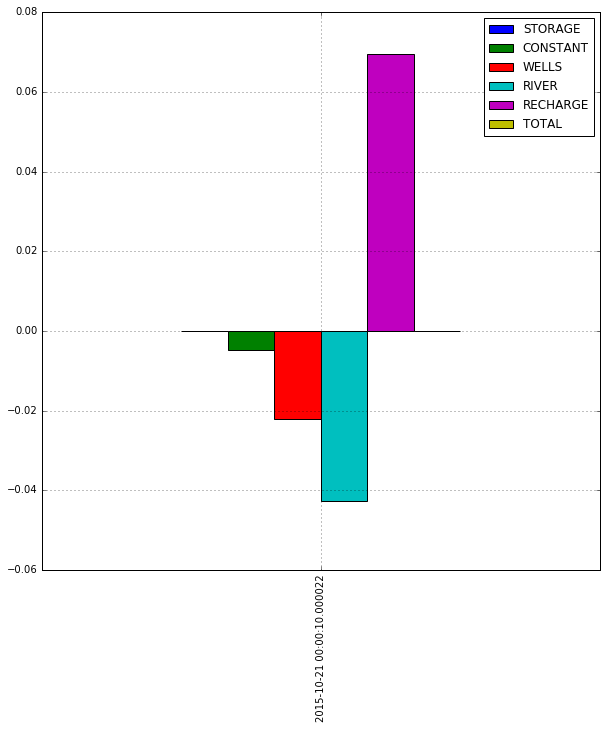

In [10]:
groups = df_flux.groupby(lambda x:x.split('_')[-1],axis=1).groups
df_flux_in = df_flux.loc[:,groups["IN"]]
df_flux_in.columns = df_flux_in.columns.map(lambda x:x.split('_')[0])

df_flux_out = df_flux.loc[:,groups["OUT"]]
df_flux_out.columns = df_flux_out.columns.map(lambda x:x.split('_')[0])


df_flux_delta = df_flux_in - df_flux_out
#df_flux_delta = df_flux.loc[:,"in"] - df_flux.loc[:,"out"]
df_flux_delta.plot(kind="bar",figsize=(10,10),grid=True)

Let's look at head

In [11]:
# if you pass the model instance, then the plots will be offset and rotated
h = flopy.utils.HeadFile(os.path.join(model_ws,"freyberg.hds"),model=ml)

/Users/jdhughes/Documents/Development/flopy_git/flopy/modflow/mfdis.py:164: UserWarning: ModflowDis.sr is deprecated. use Modflow.sr
  warnings.warn("ModflowDis.sr is deprecated. use Modflow.sr")


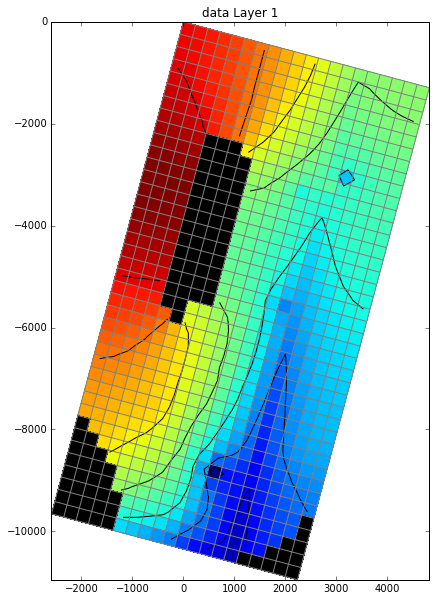

In [12]:
h.plot(contour=True,grid=True,figsize=(10,10))

In [13]:
#let's write these heads to shapefile
h.to_shapefile(os.path.join(model_ws,"freyburg_head.shp"))

### For more fine-grained plotting control with `ModelMap` - see the other notebooks